In [21]:
import numpy as np
import pandas as pd #csv DB
import matplotlib.pyplot as plt #drawing

In [33]:
def load_data(train_row):
    train = pd.read_csv("train.csv") # read data set
    #print(train.shape)
    #print(train.head())
    #train_row = 5000
    X_train = train.values[0:train_row, 1:] #row, column --> get value
    Y_train = train.values[0:train_row, 0] #get lable
    print (X_train.shape)
    print (Y_train.shape)
    Pred_test = pd.read_csv("test.csv")
    
    #print(Pred_test.shape)
    return X_train, Y_train, Pred_test

train_row = 5000
Origin_x_train, Origin_y_train, Origin_y_test = load_data(train_row)


(5000, 784)
(5000,)


In [24]:
print(Origin_x_train.shape, Origin_y_train.shape, Origin_y_test.shape)
print(Origin_x_train)

(5000, 784) (5000,) (28000, 784)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


4
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  28 247  17   0   0   0
   0   0   0   0   0  27 202   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 242 155   0   0   0   0   0   0   0   0  27 254  63
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 160 207   6
   0   0   0   0   0   0   0  27 254  65   0   0 

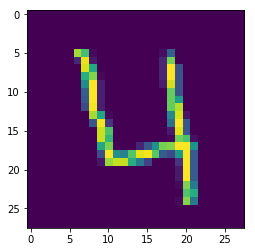

In [36]:
import matplotlib
import matplotlib.pyplot as plt

row = 3 #display image i
print (Origin_y_train[row])
print (Origin_x_train[row])


plt.imshow(Origin_x_train[row].reshape((28, 28)))
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Origin_x_train,
                                                    Origin_y_train,
                                                    test_size = 0.2, #20% for test, 80% for train
                                                    random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [45]:
#single k test
import time
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors = k)

knn.fit(X_train, Y_train) #Train: data set, label
y_predict = knn.predict(X_test) #Predict

print (y_predict)



[4 7 6 9 2 7 8 1 4 2 8 2 5 3 2 5 9 0 3 5 6 0 4 6 5 8 3 5 2 3 2 5 0 0 5 4 0
 7 1 2 9 9 3 2 1 4 0 0 9 8 5 0 1 6 5 8 5 9 4 3 9 0 4 0 1 7 5 0 1 3 5 2 0 1
 2 0 1 7 9 9 8 7 7 7 5 0 7 9 1 5 4 1 9 0 4 7 2 1 9 9 5 2 1 6 0 4 8 9 3 1 9
 4 0 6 8 4 6 9 0 2 9 9 2 6 7 9 8 5 5 8 7 8 2 7 7 8 6 9 2 9 4 3 1 4 9 5 8 9
 2 7 5 1 6 3 2 8 9 6 4 2 3 5 4 7 7 4 2 8 9 9 1 8 4 9 4 0 5 6 8 4 3 4 0 3 6
 2 4 1 5 0 6 6 4 0 8 4 5 4 7 2 7 2 3 6 0 4 2 3 0 9 9 1 7 2 1 4 5 1 9 8 2 6
 9 2 0 7 0 0 2 0 1 4 5 1 4 2 5 6 3 2 1 8 1 1 1 5 3 0 4 9 1 1 2 7 7 3 1 4 6
 2 8 6 7 1 5 6 0 0 1 3 4 7 1 7 2 6 9 9 7 8 1 1 4 9 5 6 4 6 2 8 7 7 4 9 3 4
 1 3 6 0 3 7 2 2 7 2 7 7 7 4 1 2 2 7 4 2 7 1 5 7 8 1 1 3 1 7 5 5 7 7 2 1 3
 4 3 1 3 2 6 2 5 0 9 0 3 6 0 5 0 1 4 0 5 5 2 2 7 1 7 2 2 6 9 4 1 7 1 7 0 3
 8 3 6 9 3 2 0 8 9 5 3 0 4 8 7 3 0 7 7 0 9 6 0 0 0 8 6 0 0 4 3 0 3 0 4 6 4
 2 1 4 1 4 0 4 4 3 9 0 6 5 5 3 5 9 5 3 5 9 9 9 6 3 9 3 2 9 9 6 1 4 7 7 9 7
 5 9 7 7 3 3 4 8 0 6 2 0 3 2 2 6 3 1 2 2 1 3 9 9 8 9 9 5 7 9 6 8 7 7 9 7 1
 9 6 5 5 5 7 1 7 8 8 6 5 

5


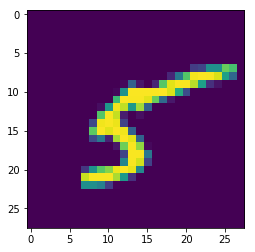

In [55]:
#check one result
row_check = 100
print(y_predict[row_check])
plt.imshow(X_test[row_check].reshape((28, 28)))
plt.show()


In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(Y_test, y_predict)
print(acc)
print(confusion_matrix(Y_test, y_predict))

0.92
[[101   0   0   0   0   0   2   0   0   0]
 [  0  98   0   0   0   0   1   0   0   1]
 [  1   3  92   1   0   0   0   2   3   2]
 [  0   0   0  96   0   0   0   1   2   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   3   1   2   0  84   3   0   1   0]
 [  2   0   0   0   0   1  90   0   0   0]
 [  0   9   0   0   1   0   0 105   0   1]
 [  1   3   3   2   1   2   1   0  70   2]
 [  3   1   1   1   3   0   0   4   0  85]]


In [72]:
#compare different k
k_range = range(1,15)
scores = []

for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train) # Train
    y_predict = knn.predict(X_test) #Predict
    accuracy = accuracy_score(Y_test, y_predict)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(Y_test, y_predict))
    print(confusion_matrix(Y_test, y_predict))
    print("Complete time: " + str(end - start) + " Secs.")
    

k = 1 begin 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       103
          1       0.82      0.98      0.89       100
          2       0.98      0.88      0.92       104
          3       0.93      0.91      0.92       100
          4       0.93      0.93      0.93       107
          5       0.91      0.89      0.90        94
          6       0.88      0.98      0.93        93
          7       0.89      0.87      0.88       116
          8       0.96      0.79      0.86        85
          9       0.83      0.83      0.83        98

avg / total       0.91      0.90      0.90      1000

[[101   0   0   0   0   0   2   0   0   0]
 [  0  98   0   0   0   0   1   0   0   1]
 [  0   4  91   1   0   0   0   4   2   2]
 [  0   0   1  91   0   2   1   2   1   2]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   3   0   1   0  84   6   0   0   0]
 [  1   0   0   0   0   1  91   0   0   0]
 [  0  10   0   0   2   0   0 101   0   3]
 [  2   3   0   4

[0.91900000000000004, 0.90600000000000003, 0.92000000000000004, 0.91500000000000004, 0.91500000000000004, 0.91400000000000003, 0.91500000000000004, 0.90900000000000003, 0.90400000000000003, 0.91300000000000003, 0.90800000000000003, 0.90900000000000003, 0.90300000000000002, 0.90000000000000002]


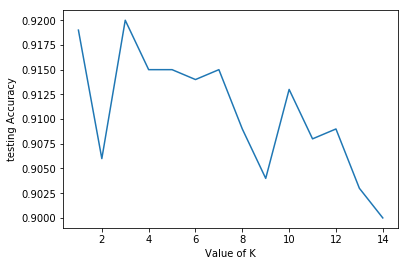

In [73]:
print (scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('testing Accuracy')
plt.show()

In [74]:
#output results to a csv file
print(len(y_predict))
pd.DataFrame({"ImageId": list(range(1, len(y_predict) + 1)), "Label":y_predict}).to_csv('KNNdigit_recogniser_result.csv', index = False, header = True)

1000
